In [1]:
%load_ext autoreload
%autoreload 2

from t_nachine.optimization import Analyzer
import pandas as pd
from tqdm import tqdm

/home/abdelelyds/Workspace/PythonProjects/just-trade-it/t_nachine/backtester/core/_plotting.py:43: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `core.set_bokeh_output(notebook=False)`.
  warnings.warn(


Loading BokehJS ...

In [2]:
path = "logs/extreme_rsi.csv"
df = pd.read_csv(path)

In [3]:
analyzer = Analyzer(df)

In [4]:
analyzer.win_rate

0.3838587414270244

In [5]:
analyzer.losing_streak_probability(n=4)

0.144

In [6]:
analyzer.winning_streak_probability(n=2)

0.147

In [7]:
analyzer.stats

Duration                         RiskToReward                 \
                 mean median min   max    std         mean median     min   
WinningTrade                                                                
False          13.130  6.000   0  1854 24.904       -1.050 -1.000 -23.132   
True           21.830 12.000   0  2285 44.150        2.047  2.000   0.000   

                           
                max   std  
WinningTrade               
False         0.000 0.311  
True         35.120 0.421

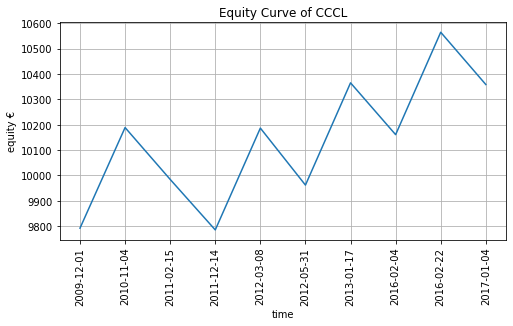

In [8]:
analyzer.plot_equity_curve()

In [9]:
def compute_cohots(price: float) -> int:
    
    if price <= 5:
        return 1
    
    if price <= 10:
        return 2
    
    if price <= 50:
        return 3
    
    if price <= 100:
        return 4
    
    if price <= 500:
        return 5
    
    if price <= 1000:
        return 6

    return 7

In [22]:
results = analyzer.backtest_results.copy()

In [24]:
def process_max_pnl(pnl, winning):
    if winning:
        return None
    
    return pnl

def process_max_negative_pnl(negative_pnl, winning):
    if winning:
        return negative_pnl
    return None

In [25]:
results['MaxPnL'] = results.apply(lambda x: process_max_pnl(x.MaxPnL, x.WinningTrade), axis=1)

In [26]:
results['MaxNegativePnl'] = results.apply(lambda x: process_max_negative_pnl(x.MaxNegativePnl, x.WinningTrade), axis=1)

In [28]:
results['normMaxPnL'] = results['MaxPnL'] / results['OneR']

In [30]:
results['normMaxNegativePnL'] = results['MaxNegativePnl'] / results['OneR']

In [31]:
results

,Size,Volume,EntryBar,ExitBar,OneR,SlPrice,TpPrice,EntryPrice,ExitPrice,MaxPnL,...,PnL,ReturnPct,EntryTime,ExitTime,Symbol,Duration,WinningTrade,RiskToReward,normMaxPnL,normMaxNegativePnL
0,252,51540,100,118,0.796,NaN,21.948,20.356,19.560,0.445,...,-200.592,-0.039,2013-06-28,2013-07-25,vno_l,18,False,-1.000,0.559,NaN
1,825,28154,606,627,0.240,22.320,23.040,22.560,23.040,NaN,...,396.000,0.021,2015-07-02,2015-08-03,vno_l,21,True,2.000,NaN,-0.263
2,808,26967,659,663,0.250,NaN,23.430,22.930,22.680,0.080,...,-202.000,-0.011,2015-09-17,2015-09-23,vno_l,4,False,-1.000,0.320,NaN
3,488,38180,698,720,0.410,NaN,24.990,24.170,23.760,0.800,...,-200.080,-0.017,2015-11-11,2015-12-14,vno_l,22,False,-1.000,1.951,NaN
4,310,10911,931,949,0.640,NaN,26.690,25.410,24.600,0.620,...,-251.100,-0.032,2016-10-14,2016-11-09,vno_l,18,False,-1.266,0.969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99727,461,78458,297,351,0.439,NaN,10.441,9.563,9.124,0.850,...,-202.425,-0.046,2012-08-27,2012-11-14,fdus,54,False,-1.000,1.936,NaN
99728,455,162384,383,403,0.440,9.971,11.291,10.411,11.291,NaN,...,400.400,0.085,2013-01-02,2013-01-31,fdus,20,True,2.000,NaN,-0.566
99729,149,198989,695,722,1.371,NaN,16.440,13.698,12.327,0.253,...,-204.279,-0.100,2014-03-31,2014-05-08,fdus,27,False,-1.000,0.185,NaN
99730,602,74023,1218,1227,0.336,NaN,14.172,13.500,13.164,0.325,...,-202.272,-0.025,2016-04-27,2016-05-10,fdus,9,False,-1.000,0.967,NaN


## Losing Trades

In [34]:
losses = results[~results.WinningTrade]

In [38]:
losses.normMaxPnL.describe(percentiles=[0.75, 0.8, 0.9])

count   61449.000
mean        0.665
std         0.574
min         0.000
50%         0.513
75%         1.012
80%         1.154
90%         1.513
max        45.884
Name: normMaxPnL, dtype: float64

In [ ]:
## Less than 10 % of lossing reach at least 1.5R

In [41]:
losses[losses.normMaxPnL >= 2.0]

,Size,Volume,EntryBar,ExitBar,OneR,SlPrice,TpPrice,EntryPrice,ExitPrice,MaxPnL,...,PnL,ReturnPct,EntryTime,ExitTime,Symbol,Duration,WinningTrade,RiskToReward,normMaxPnL,normMaxNegativePnL
88,592,8204,47,48,0.338,NaN,25.975,25.299,24.686,1.592,...,-362.896,-0.024,2016-08-01,2016-08-02,ibkco,1,False,-1.814,4.710,NaN
157,297,60858,973,974,0.708,NaN,36.546,35.130,34.422,1.431,...,-210.276,-0.020,2015-09-22,2015-09-23,kbwb,1,False,-1.000,2.021,NaN
2399,227,2824609,2623,2639,0.863,NaN,19.216,17.490,16.627,2.175,...,-195.901,-0.049,2015-07-30,2015-08-21,rgc,16,False,-1.000,2.520,NaN
2502,302,571770,431,462,0.670,NaN,13.340,12.000,11.330,1.340,...,-202.340,-0.056,2006-11-09,2006-12-26,ttmi,31,False,-1.000,2.000,NaN
2972,2881,466019,1541,1545,0.070,NaN,1.650,1.510,1.440,0.340,...,-201.670,-0.046,2011-05-31,2011-06-06,aehr,4,False,-1.000,4.857,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97889,662,2272,109,118,0.303,NaN,28.925,28.320,28.017,13.880,...,-200.255,-0.011,2017-03-09,2017-03-22,ttac,9,False,-1.000,45.884,NaN
98202,470,4308,1203,1214,0.430,NaN,6.980,6.120,5.590,1.080,...,-249.100,-0.087,2012-04-16,2012-05-14,tik,11,False,-1.233,2.512,NaN
98791,60,62983,884,885,3.559,NaN,41.502,34.384,30.825,7.823,...,-213.540,-0.104,2008-09-19,2008-09-22,wf,1,False,-1.000,2.198,NaN
98834,256,94214,2395,2396,0.830,NaN,19.690,18.030,17.200,2.460,...,-212.480,-0.046,2014-09-03,2014-09-04,acta,1,False,-1.000,2.964,NaN


In [43]:
0.338*2

0.676